# NYC High School Directory (2013–2014)

This notebook explores the NYC High School Directory dataset.  
We clean the column names, filter schools in Brooklyn, answer a few questions about Grade 9 entry, and summarize and visualize the distribution of schools and students across boroughs.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('doe-high-school-directory-2013-2014.csv')

df.head()

## Cleaning column names

**Task:** Clean the column names (make lowercase, replace spaces with `_`, and remove special characters).

**Answer:**

We standardized all column names by:
- converting them to lowercase,
- stripping leading/trailing spaces,
- replacing spaces with underscores (`_`),
- and removing special characters.

This makes the dataset easier to work with and avoids issues when referencing columns in code.

In [9]:
df.columns = (
    df.columns
      .str.lower()                            
      .str.strip()                             
      .str.replace(' ', '_')                   
      .str.replace('[^0-9a-zA-Z_]', '', regex=True)  
)


df.columns

## Filtering for Brooklyn schools

**Question:** Filter the dataset to include only schools located in Brooklyn.

**Answer:**

We created a subset of the data that keeps only rows where the `borough` column is equal to "BROOKLYN" (ignoring extra spaces and case). This subset will be used to answer the questions specific to Brooklyn.


In [14]:
df_brooklyn = df[df['borough'].str.strip().str.lower() == 'brooklyn']

In [15]:
df_brooklyn.head()

,dbn,boro,bn,building_code,school_phone_number,fax_number,printed_name,alphabetic_name_long,grade_span_20142015_min,grade_span_20142015_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
203,13K265,K,K265,K265,718-834-6760,718-834-6776,Dr. Susan S. McKinney Secondary School of the ...,Dr. Susan S. McKinney Secondary School of the ...,6.0,12,...,35.0,211.0,3057942.0,3.020280e+09,Fort Greene ...,17212.0,68,2,48,55
204,13K350,K,K350,K805,718-858-0249,718-858-0492,The Urban Assembly School of Music and Art,The Urban Assembly School of Music and Art,9.0,12,...,33.0,15.0,3000216.0,3.001200e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hi...,16865.0,68,2,38,54
205,13K412,K,K412,K117,718-230-5748,718-230-3050,Brooklyn Community High School of Communicatio...,Brooklyn Community High School of Communicatio...,9.0,12,...,33.0,235.0,3055165.0,3.019260e+09,Clinton Hill ...,17212.0,69,2,38,51
206,13K419,K,K419,K805,718-243-9413,718-243-9399,"Science Skills Center High School for Science,...","Science Skills Center High School for Science,...",9.0,12,...,33.0,15.0,3000216.0,3.001200e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hi...,16865.0,68,2,38,54
207,13K439,K,K439,K805,718-643-9315,718-643-9516,Brooklyn International High School,Brooklyn International High School,9.0,12,...,33.0,15.0,3000216.0,3.001200e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hi...,16865.0,68,2,38,54


### Question 1: How many total schools are in Brooklyn?

We count unique schools using the `dbn` column (the school identifier).

**Answer:**

There are **118** unique schools in Brooklyn in this dataset.


In [18]:
# Filter Brooklyn
mask_brooklyn = df['borough'].str.strip().str.lower() == 'brooklyn'
df_brooklyn = df[mask_brooklyn]

# Count unique schools (use your column with the unique school ID: dbn, school_id, etc.)
n_schools_brooklyn = df_brooklyn['dbn'].nunique()
n_schools_brooklyn

118

### Question 2: How many schools in Brooklyn offer Grade 9 entry?

We treat a school as offering Grade 9 entry if its 2014–2015 grade span includes Grade 9, i.e.:

- `grade_span_20142015_min` ≤ 9, and  
- `grade_span_20142015_max` ≥ 9.

**Answer:**

There are **118** schools in Brooklyn that offer Grade 9 entry.  
In this dataset, every Brooklyn school has a grade span that includes Grade 9.


In [26]:
# use the actual name of the identifier column
school_id_col = 'dbn'  # or 'school_id', etc.

mask_grade9 = (
    (df_brooklyn['grade_span_20142015_min'] <= 9) &
    (df_brooklyn['grade_span_20142015_max'] >= 9)
)

n_schools_brooklyn_grade9 = df_brooklyn.loc[mask_grade9, school_id_col].nunique()
n_schools_brooklyn_grade9

118

## Grouping and summarizing by borough

We now group the dataset by `borough` to compute:

1. The count of unique schools per borough.  
2. The average number of students per borough.  
3. Summary statistics of `grade_span_20142015_max` per borough.


In [28]:
# Count of schools per borough (unique schools)

schools_per_borough = (
    df
    .groupby('borough')['dbn']   # group by borough and use the school ID
    .nunique()                   # count unique schools
)

schools_per_borough

borough
BRONX        116
BROOKLYN     118
MANHATTAN    101
QUEENS        75
STATEN IS     10
Name: dbn, dtype: int64

In [31]:
df.columns = (
    df.columns
      .str.lower()
      .str.strip()
      .str.replace(' ', '_')
      .str.replace('[^0-9a-zA-Z_]', '', regex=True)
)

In [38]:
# Summary of grade_span_20142015_max grouped by borough

avg_students_per_borough = (
    df
    .groupby('borough')['total_student_1026'] 
    .mean()
    .reset_index(name='avg_students')
)

avg_students_per_borough

,borough,avg_students
0,BRONX,521.486239
1,BROOKLYN,716.051282
2,MANHATTAN,596.193878
3,QUEENS,1100.957143
4,STATEN IS,1839.100000


In [39]:
# Summary of grade_span_20142015_max grouped by borough

grade_max_summary = (
    df
    .groupby('borough')['grade_span_20142015_max']
    .describe()   # count, mean, std, min, 25%, 50%, 75%, max
)

grade_max_summary

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
BRONX,116.0,11.810345,0.542359,10.0,12.0,12.0,12.0,12.0
BROOKLYN,118.0,11.966102,0.223882,10.0,12.0,12.0,12.0,12.0
MANHATTAN,101.0,11.871287,0.439622,10.0,12.0,12.0,12.0,12.0
QUEENS,75.0,11.826667,0.554425,10.0,12.0,12.0,12.0,12.0
STATEN IS,10.0,12.000000,0.000000,12.0,12.0,12.0,12.0,12.0


## Visualization: Number of schools per borough

The following bar chart shows the number of unique high schools in each borough.


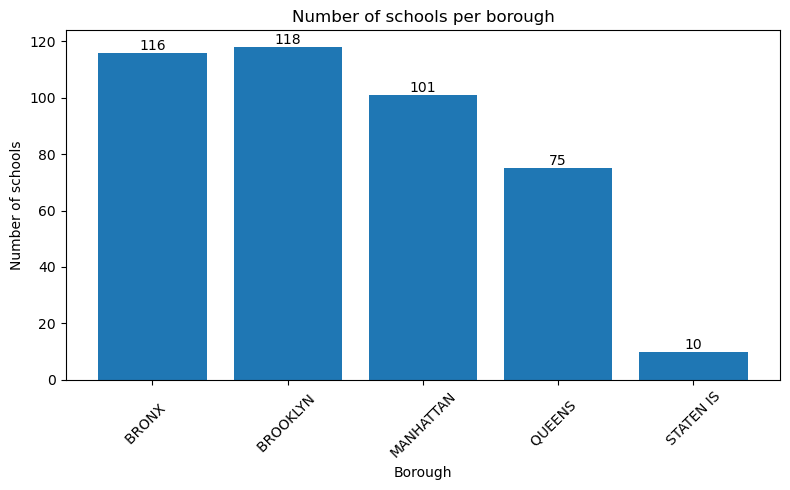

In [43]:
import matplotlib.pyplot as plt

schools_per_borough = (
    df
    .groupby('borough')['dbn']
    .nunique()
    .reset_index(name='num_schools')
)

plt.figure(figsize=(8, 5))
bars = plt.bar(schools_per_borough['borough'], schools_per_borough['num_schools'])

plt.xlabel('Borough')
plt.ylabel('Number of schools')
plt.title('Number of schools per borough')
plt.xticks(rotation=45)

plt.bar_label(bars)

plt.tight_layout()
plt.show()


## Summary of observations

1. **Distribution of schools by borough**  
   High schools are not evenly distributed across boroughs. Brooklyn has the highest number of schools (118), closely followed by the Bronx (116) and Manhattan (101). Queens has fewer schools (75), and Staten Island has only 10 schools in this dataset.

2. **Average school size**  
   The average number of students per school varies widely by borough. Bronx schools are the smallest on average (around 520 students), while Brooklyn and Manhattan have medium-sized schools (roughly 600–720 students). Queens and Staten Island have the largest average school sizes, with about 1,100 and 1,840 students per school, respectively.

3. **Grade span patterns**  
   The summary statistics for `grade_span_20142015_max` show that almost all schools in every borough go up to Grade 12 (the median and 75th percentile are 12 in all boroughs). This indicates that most schools in the dataset are full high schools that include the final high school grade.
